# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.0
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.1
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blis                             0.7.9


In [3]:
#@title
import zipfile
import os

In [4]:
#@title

!wget --no-check-certificate \
    "https://github.com/Ujjwal-wadhwa/data/archive/refs/heads/main.zip"


# zip_ref = zipfile.ZipFile('/tmp/cats-and-dogs.zip', 'r') #Opens the zip file in read mode
# zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
# zip_ref.close()

--2023-07-10 15:26:46--  https://github.com/Ujjwal-wadhwa/data/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/Ujjwal-wadhwa/data/zip/refs/heads/main [following]
--2023-07-10 15:26:46--  https://codeload.github.com/Ujjwal-wadhwa/data/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [                <=> ]   1.15G  18.9MB/s    in 62s     

2023-07-10 15:27:48 (19.2 MB/s) - ‘main.zip’ saved [1239104911]



In [5]:
#@title
!unzip main.zip

Archive:  main.zip
8382f7d993a2efc8c9979d06f5d36b183e68f5cc
   creating: data-main/
   creating: data-main/FIDAC_2.0/
   creating: data-main/FIDAC_2.0/FIDAC_1.0/
   creating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_0.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_10.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_100.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1000.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1004.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1006.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1007.jpg  
  inflating: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_101.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDAC_Au_1014.jpg  
 extracting: data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images/FIDA

In [6]:
import tensorflow as tf
import os
import random

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove images with wrong extensions and corrupted images




In [9]:
import cv2
import imghdr
import matplotlib.pyplot as plt


In [10]:
data_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0'

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
rmdir /content/data-main/FIDAC_2.0/FIDAC_1.0/.ipynb_checkpoints


In [15]:
for image_class in os.listdir(data_dir):
  print(image_class)

Authentic_Images
Tampered_Images


In [16]:
import os
import random
import shutil

# Set the paths to your original dataset
authentic_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0/Authentic_Images'
tampered_dir = '/content/data-main/FIDAC_2.0/FIDAC_1.0/Tampered_Images'

# Create a new directory to store the balanced dataset
balanced_dir = '/content/data-main/FIDAC_2.0/balanced'
os.makedirs(balanced_dir, exist_ok=True)

# Create separate class folders inside the balanced directory
balanced_authentic_dir = os.path.join(balanced_dir, 'authentic')
balanced_tampered_dir = os.path.join(balanced_dir, 'tampered')
os.makedirs(balanced_authentic_dir, exist_ok=True)
os.makedirs(balanced_tampered_dir, exist_ok=True)

# Count the number of images in each class
authentic_images = os.listdir(authentic_dir)
tampered_images = os.listdir(tampered_dir)
authentic_count = len(authentic_images)
tampered_count = len(tampered_images)

# Calculate the oversampling ratio
oversampling_ratio = authentic_count // tampered_count

# Oversample the tampered images
for root, dirs, files in os.walk(tampered_dir):
    for file in files:
        image_path = os.path.join(root, file)
        shutil.copy(image_path, balanced_tampered_dir)

        # Perform oversampling
        for _ in range(oversampling_ratio - 1):
            new_filename = f"oversampled_{random.randint(1, 100000)}.jpg"
            new_image_path = os.path.join(balanced_tampered_dir, new_filename)
            shutil.copy(image_path, new_image_path)

# Undersample the authentic images
for root, dirs, files in os.walk(authentic_dir):
    random.shuffle(files)
    undersampled_files = files[:tampered_count]
    for file in undersampled_files:
        image_path = os.path.join(root, file)
        shutil.copy(image_path, balanced_authentic_dir)



# 3. Load Data

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/data-main/FIDAC_2.0/balanced')

Found 1050 files belonging to 2 classes.


In [19]:
balanced_dir = '/content/data-main/FIDAC_2.0/balanced'

In [20]:
for image_class in os.listdir(balanced_dir):
  print(image_class)

authentic
tampered


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

In [23]:
batch[0].shape

(32, 256, 256, 3)

In [24]:
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

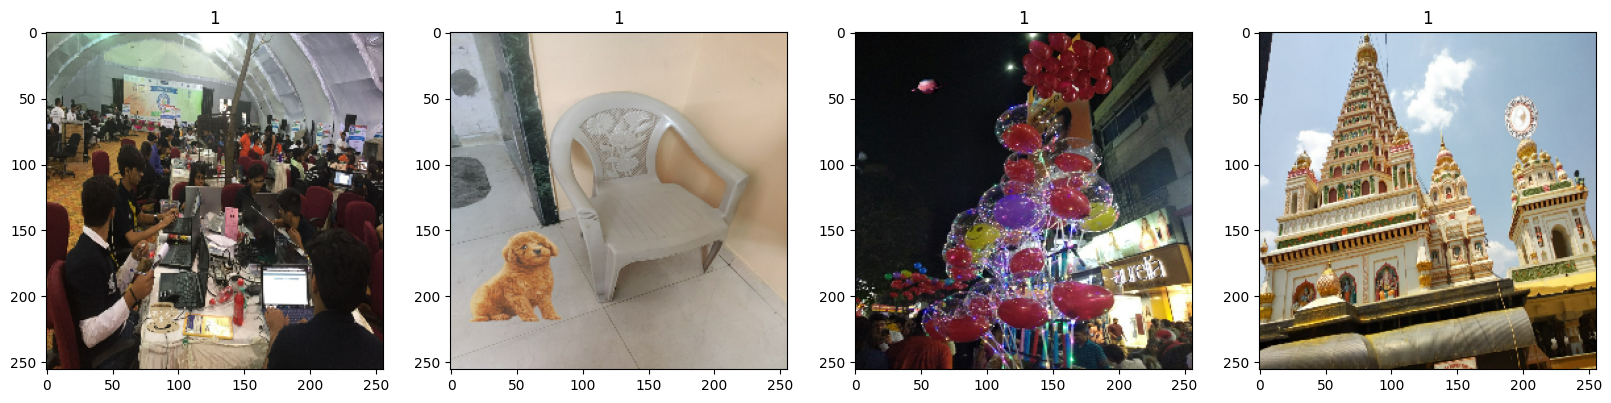

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
class_names = ['authentic', 'tampered']

# Iterate over the labels and print the class association
for label in batch[1]:
    class_association = class_names[label]
    print(class_association)

tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
tampered
authentic
tampered
authentic
authentic
tampered
tampered
tampered
authentic
tampered
authentic
tampered
authentic
tampered
tampered
authentic
tampered
tampered
tampered
tampered
authentic
tampered


so, basically authentic has been assigned 0 and tampered has been assigned 1.


# 4. Scale Data

In [27]:
batch[0].max()

255.0

In [28]:
data.as_numpy_iterator().next()

(array([[[[187.59375  , 194.15625  , 195.59375  ],
          [189.11816  , 193.11816  , 196.11816  ],
          [183.61035  , 189.61035  , 189.61035  ],
          ...,
          [209.33008  , 183.33008  , 156.33008  ],
          [205.68555  , 184.16992  , 155.3418   ],
          [209.50293  , 185.50293  , 157.50293  ]],
 
         [[185.70996  , 190.13867  , 193.50488  ],
          [185.68164  , 190.45801  , 193.35449  ],
          [189.87793  , 195.75293  , 195.94043  ],
          ...,
          [208.11914  , 182.11914  , 155.11914  ],
          [208.29199  , 186.77637  , 157.94824  ],
          [209.42871  , 185.42871  , 157.42871  ]],
 
         [[190.4375   , 196.5625   , 201.6875   ],
          [181.85645  , 190.45898  , 190.0498   ],
          [182.22363  , 188.53613  , 191.09863  ],
          ...,
          [209.05273  , 183.49023  , 155.17773  ],
          [208.5625   , 183.4375   , 156.       ],
          [210.53418  , 186.00098  , 158.26758  ]],
 
         ...,
 
         [[2

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [30]:
data.as_numpy_iterator().next()

(array([[[[1.55560657e-01, 6.53645843e-02, 3.79136018e-02],
          [1.49348959e-01, 7.09175840e-02, 3.56234685e-02],
          [1.62745103e-01, 6.47058859e-02, 3.72549035e-02],
          ...,
          [1.39545038e-01, 4.54273894e-02, 6.21170364e-03],
          [1.79419428e-01, 6.96155056e-02, 2.64782477e-02],
          [1.55560657e-01, 4.18351702e-02, 1.83057599e-02]],
 
         [[1.50007665e-01, 6.56939372e-02, 3.62821706e-02],
          [1.47074148e-01, 6.56786188e-02, 3.33180130e-02],
          [1.51953131e-01, 7.35217556e-02, 3.62821706e-02],
          ...,
          [1.41161159e-01, 3.23299617e-02, 1.37254903e-02],
          [1.53929234e-01, 4.41253074e-02, 1.66590065e-02],
          [1.42149210e-01, 4.21645232e-02, 1.66896451e-02]],
 
         [[1.62431061e-01, 6.34497553e-02, 4.02343757e-02],
          [1.62431061e-01, 6.83134198e-02, 4.28232215e-02],
          [1.49647668e-01, 6.53339475e-02, 3.59221809e-02],
          ...,
          [1.47058830e-01, 3.72549035e-02, 1.5686

# 5. Load transfer learning model and Split Data

In [31]:
from tensorflow.keras.applications import EfficientNetV2L

model = EfficientNetV2L(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

model.summary()

473176280/473176280 [==============================] - 5s 0us/step
Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                

In [32]:
for layer in model.layers:
  layer.trainable = False#this means go through all the layers in this model and freeze its weights, so that it is not trainable and treat that model as a single function that output 7,7 image.

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

my_model = Sequential([model,
                       GlobalAveragePooling2D(),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(1, activation='sigmoid')])

my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [35]:
import tensorflow as tf

BATCH_SIZE = 4
SEED = 1

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/data-main/FIDAC_2.0/balanced',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=SEED)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/data-main/FIDAC_2.0/balanced',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=False,
    validation_split=0.2,
    subset='validation',
    seed=SEED
)


Found 1050 files belonging to 2 classes.
Using 840 files for training.
Found 1050 files belonging to 2 classes.
Using 210 files for validation.


In [36]:
data_iterator = train_dataset.as_numpy_iterator()

In [37]:
batch = data_iterator.next()
batch[0].shape

(4, 224, 224, 3)

In [38]:
batch[1]

array([0, 1, 0, 0], dtype=int32)

In [39]:
iterator = iter(train_dataset)
next(iterator)[0][0].numpy().shape

(224, 224, 3)

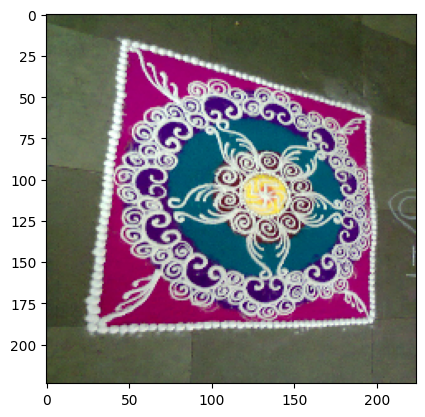

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(next(iterator)[0][0].numpy().astype(np.int32))

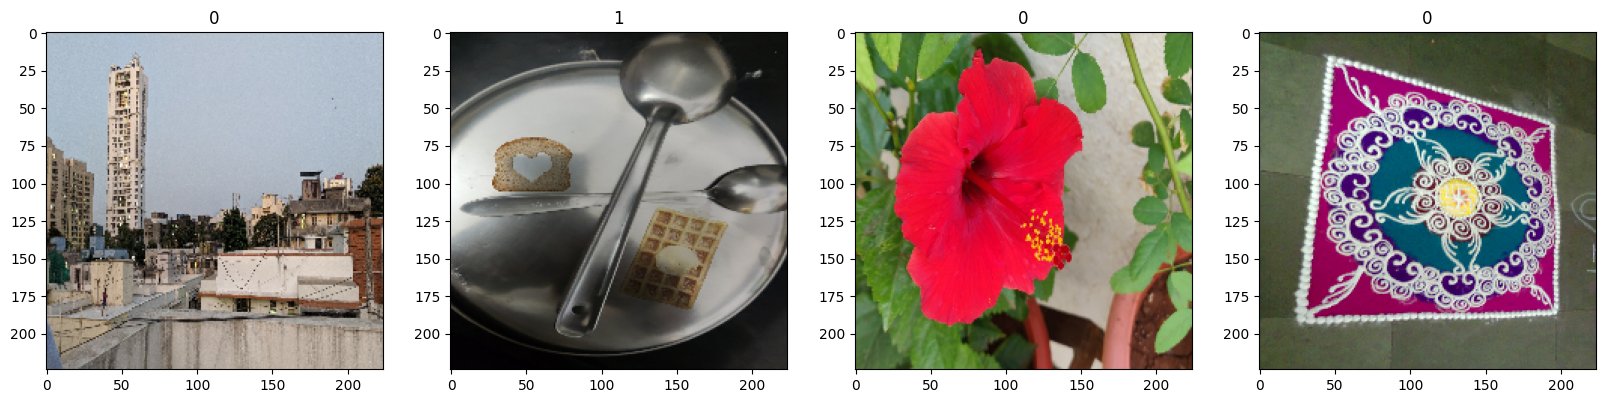

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 6. training the Deep Learning Model

In [42]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
from tensorflow.keras.metrics import *

metrics = ['accuracy', Precision(), Recall(), AUC()]

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

my_model.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(learning_rate=0.001),
                 metrics=metrics)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, monitor='val_loss')#so in this we will stop the model from training if it reaches a peak and the model is not able
# to beat it in the next 3 iteration.

In [46]:
hist = my_model.fit(train_dataset, epochs=30,
             validation_data=val_dataset,
             callbacks=[es])

Epoch 1/30
210/210 [==============================] - 93s 261ms/step - loss: 0.6675 - accuracy: 0.6536 - precision: 0.6890 - recall: 0.8687 - auc: 0.5781 - val_loss: 0.4660 - val_accuracy: 0.8095 - val_precision: 1.0000 - val_recall: 0.8095 - val_auc: 0.0000e+00
Epoch 2/30
210/210 [==============================] - 45s 212ms/step - loss: 0.5489 - accuracy: 0.7250 - precision: 0.7551 - recall: 0.8651 - auc: 0.7554 - val_loss: 0.3309 - val_accuracy: 0.8476 - val_precision: 1.0000 - val_recall: 0.8476 - val_auc: 0.0000e+00
Epoch 3/30
210/210 [==============================] - 47s 215ms/step - loss: 0.4704 - accuracy: 0.7905 - precision: 0.8105 - recall: 0.8921 - auc: 0.8335 - val_loss: 0.4127 - val_accuracy: 0.7857 - val_precision: 1.0000 - val_recall: 0.7857 - val_auc: 0.0000e+00
Epoch 4/30
210/210 [==============================] - 47s 219ms/step - loss: 0.4158 - accuracy: 0.7869 - precision: 0.8168 - recall: 0.8741 - auc: 0.8744 - val_loss: 0.2772 - val_accuracy: 0.9190 - val_precision

# 7. Plot Performance

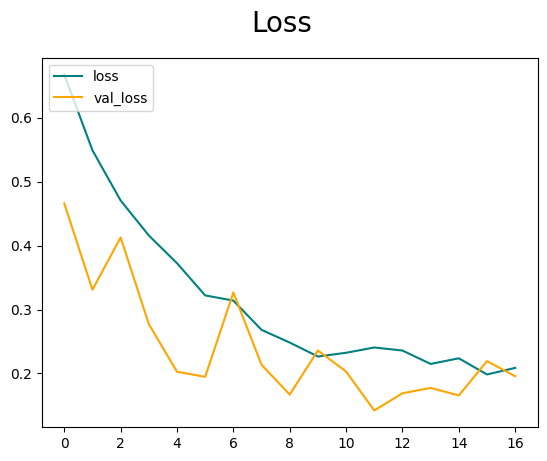

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

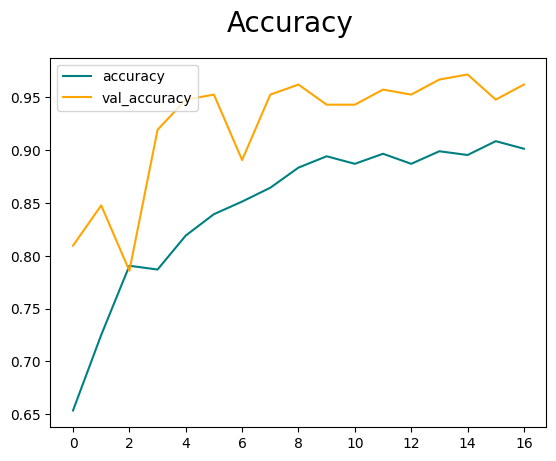

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Save the Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models','transferlearn.h5'))